In [1]:
import numpy as np

import DQN

Using TensorFlow backend.


In [4]:
def get_ang_matrix(angle, n=16):
    while angle > 0 : angle -= 360
    while angle < 0 : angle += 360
    my_ang  = np.zeros([n, n])
    for i in range(16):
        for j in range(16):
            if 360-22.5 < angle or angle <= 22.5 :              #   0°
                if 10 <= i and 10 <= j      : my_ang[i][j] = 1
            if  45-22.5 < angle <=  45+22.5 :                   #  45°
                if 10 <= i and  5 <= j <= 10: my_ang[i][j] = 1
            if  90-22.5 < angle <=  90+22.5 :                   #  90°
                if 10 <= i and  5 >= j      : my_ang[i][j] = 1
            if 135-22.5 < angle <= 135+22.5 :                   # 135°
                if  5 <= i <=10 and  5 >= j : my_ang[i][j] = 1
            if 180-22.5 < angle <= 180+22.5 :                   # 180°
                if  5 >= i and  5 >= j      : my_ang[i][j] = 1
            if 225-22.5 < angle <= 225+22.5 :                   # 225°
                if  5 >= i and  5 <= j <= 10: my_ang[i][j] = 1
            if 270-22.5 < angle <= 270+22.5 :                   # 270°
                if  5 >= i and  10 <= j     : my_ang[i][j] = 1
            if 315-22.5 < angle <= 315+22.5 :                   # 315°
                if  5 <= i <=10 and 10 <= j : my_ang[i][j] = 1
    #print(my_ang)
    return my_ang

In [103]:
my_pos = [
    [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [7, 7], [8, 9], [8, 10], [7, 11], [6, 11], [5, 12], [4, 12], [3, 13], [2, 13]
]

enemy_pos = [
    [14, 14], [13, 13], [12, 13], [11, 13], [10, 13], [9, 13], [8, 13], [7, 13], [6, 13], [5, 13], [4, 13], [3, 13], [2, 13], [1, 13]
]

my_angle = [
    45, 45, 45, 45, 45, 70, 70, 90, 135, 180, 135, 180, 135, 180
]

actions = [
    [2, 2], [3, 3], [4, 4], [5, 5], [7, 7], [8, 9], [8, 10], [7, 11], [6, 11], [5, 12], [4, 12], [3, 13], [2, 13], [1, 13]
]
    
NUM_STEP = 14

In [241]:
mainQN = DQN.QNetwork(debug_log=True)
memory = DQN.Memory(max_size=1000)

for i in range(NUM_STEP):
        state = np.zeros((16, 16, 8))
        state[my_pos[i][0], my_pos[i][1], 0] = 1.0
        state[enemy_pos[i][0], enemy_pos[i][1], 1] = 1.0
        state[:, :, 2] = get_ang_matrix(my_angle[i])
        state = state.reshape((1, 16, 16, 8))

        action = actions[i]

        if i != NUM_STEP - 1:
            next_state = np.zeros((16, 16, 8))
            next_state[my_pos[i+1][0], my_pos[i+1][1], 0] = 1.0
            next_state[enemy_pos[i+1][0], enemy_pos[i+1][1], 1] = 1.0
            next_state[:, :, 2] = get_ang_matrix(my_angle[i + 1])
            next_state = state.reshape((1, 16, 16, 8))
            reward = 0.0
        else:
            next_state = np.zeros((1, 16, 16, 8))
            reward = 1.0

        memory.add((state, action, reward, next_state))

Model: "functional_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 16, 16, 8)]  0                                            
__________________________________________________________________________________________________
depthwise_conv2d_418 (Depthwise (None, 16, 16, 8)    400         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_836 (BatchN (None, 16, 16, 8)    32          depthwise_conv2d_418[0][0]       
__________________________________________________________________________________________________
activation_836 (Activation)     (None, 16, 16, 8)    0           batch_normalization_836[0][0]    
______________________________________________________________________________________

In [242]:
num_epochs = 1000
preds = np.zeros((num_epochs, 14, 16, 16))
losses = []
inputs=np.array([state[0][0].tolist() for state in memory.buffer])
for epoch in range(num_epochs):
    loss = mainQN.replay(memory, NUM_STEP, 0.97)
    losses.append(loss)
    pred = mainQN.model.predict(inputs).reshape((14, 16, 16))
    preds[epoch, :, :, :] = pred
    pred_now = [pred[i, actions[i][0], actions[i][1]] for i in range(14)]
    print('epoch:{}, loss:{}'.format(epoch, loss))
    print(np.round(pred_now, 4))

epoch:0, loss:0.03583027049899101
[ 4.7e-03  4.5e-03  4.3e-03  6.3e-03  5.4e-03  2.8e-03  3.7e-03  1.0e-04
 -2.5e-03 -1.4e-03  1.4e-03  2.3e-03  1.6e-03  2.2e-03]
epoch:1, loss:0.035824377089738846
[ 0.0048  0.0046  0.0044  0.0064  0.0055  0.0029  0.0038  0.0002 -0.0024
 -0.0013  0.0015  0.0024  0.0017  0.0024]
epoch:2, loss:0.03581521287560463
[ 0.0049  0.0048  0.0046  0.0066  0.0056  0.0031  0.004   0.0003 -0.0022
 -0.0012  0.0017  0.0025  0.0019  0.0025]
epoch:3, loss:0.03580345958471298
[ 0.0051  0.0049  0.0048  0.0067  0.0057  0.0033  0.0042  0.0005 -0.002
 -0.001   0.0018  0.0027  0.0021  0.0027]
epoch:4, loss:0.03578939288854599
[ 0.0053  0.0051  0.0049  0.0069  0.0059  0.0034  0.0044  0.0007 -0.0018
 -0.0008  0.002   0.0029  0.0023  0.0029]
epoch:5, loss:0.03577325865626335
[ 0.0055  0.0053  0.0052  0.0071  0.0061  0.0037  0.0046  0.0009 -0.0016
 -0.0006  0.0023  0.0032  0.0025  0.0032]
epoch:6, loss:0.035755258053541183
[ 0.0058  0.0056  0.0054  0.0073  0.0063  0.0039  0.0048 

epoch:59, loss:0.03412064164876938
[0.0254 0.0252 0.0251 0.0254 0.0226 0.0228 0.0261 0.0228 0.0203 0.0208
 0.0244 0.0253 0.0249 0.0256]
epoch:60, loss:0.03408893942832947
[0.0258 0.0255 0.0255 0.0257 0.0229 0.0231 0.0266 0.0232 0.0207 0.0213
 0.0249 0.0258 0.0253 0.026 ]
epoch:61, loss:0.03405734524130821
[0.0261 0.0259 0.0258 0.0261 0.0233 0.0235 0.027  0.0237 0.0212 0.0217
 0.0253 0.0262 0.0258 0.0264]
epoch:62, loss:0.034025829285383224
[0.0265 0.0263 0.0262 0.0264 0.0236 0.0238 0.0274 0.0241 0.0216 0.0221
 0.0258 0.0266 0.0262 0.0269]
epoch:63, loss:0.03399435430765152
[0.0268 0.0266 0.0265 0.0268 0.0239 0.0242 0.0279 0.0245 0.022  0.0226
 0.0262 0.0271 0.0266 0.0273]
epoch:64, loss:0.0339629240334034
[0.0272 0.027  0.0269 0.0271 0.0242 0.0245 0.0283 0.025  0.0225 0.023
 0.0266 0.0275 0.0271 0.0277]
epoch:65, loss:0.033931564539670944
[0.0275 0.0273 0.0272 0.0274 0.0246 0.0249 0.0287 0.0254 0.0229 0.0234
 0.0271 0.0279 0.0275 0.0282]
epoch:66, loss:0.033900246024131775
[0.0279 0.02

epoch:120, loss:0.03231522813439369
[0.0457 0.0456 0.0455 0.0458 0.0422 0.044  0.0491 0.0469 0.0449 0.0457
 0.049  0.0495 0.05   0.0509]
epoch:121, loss:0.03228747099637985
[0.0461 0.0459 0.0458 0.0461 0.0425 0.0443 0.0495 0.0472 0.0453 0.0461
 0.0494 0.0499 0.0504 0.0513]
epoch:122, loss:0.032259758561849594
[0.0464 0.0462 0.0461 0.0464 0.0428 0.0446 0.0498 0.0476 0.0456 0.0465
 0.0497 0.0502 0.0507 0.0517]
epoch:123, loss:0.03223207965493202
[0.0467 0.0466 0.0464 0.0468 0.0431 0.045  0.0502 0.048  0.046  0.0468
 0.0501 0.0506 0.0511 0.0521]
epoch:124, loss:0.03220443055033684
[0.047  0.0469 0.0467 0.0471 0.0434 0.0453 0.0506 0.0483 0.0464 0.0472
 0.0505 0.051  0.0515 0.0525]
epoch:125, loss:0.03217681497335434
[0.0474 0.0472 0.0471 0.0474 0.0438 0.0456 0.0509 0.0487 0.0467 0.0476
 0.0508 0.0513 0.0518 0.0529]
epoch:126, loss:0.03214931860566139
[0.0477 0.0475 0.0474 0.0477 0.0441 0.046  0.0513 0.0491 0.0471 0.0479
 0.0512 0.0517 0.0522 0.0533]
epoch:127, loss:0.03212190791964531
[0.0

epoch:180, loss:0.030848011374473572
[0.0644 0.0643 0.0641 0.0645 0.0605 0.0635 0.0694 0.068  0.066  0.0671
 0.07   0.0709 0.0711 0.0723]
epoch:181, loss:0.0308249332010746
[0.0647 0.0646 0.0644 0.0648 0.0608 0.0638 0.0698 0.0684 0.0663 0.0675
 0.0703 0.0713 0.0714 0.0727]
epoch:182, loss:0.030801890417933464
[0.065  0.0649 0.0647 0.0651 0.0611 0.0641 0.0701 0.0687 0.0667 0.0678
 0.0707 0.0716 0.0718 0.073 ]
epoch:183, loss:0.030778858810663223
[0.0653 0.0652 0.065  0.0654 0.0614 0.0645 0.0704 0.0691 0.067  0.0682
 0.071  0.072  0.0721 0.0734]
epoch:184, loss:0.030755862593650818
[0.0656 0.0655 0.0653 0.0657 0.0617 0.0648 0.0707 0.0694 0.0673 0.0685
 0.0713 0.0723 0.0724 0.0737]
epoch:185, loss:0.03073289431631565
[0.0659 0.0658 0.0656 0.0661 0.062  0.0651 0.0711 0.0697 0.0677 0.0688
 0.0717 0.0727 0.0728 0.074 ]
epoch:186, loss:0.030709940940141678
[0.0662 0.0661 0.0659 0.0664 0.0623 0.0654 0.0714 0.0701 0.068  0.0692
 0.072  0.073  0.0731 0.0744]
epoch:187, loss:0.030687008053064346


epoch:240, loss:0.02951856330037117
[0.0822 0.082  0.0819 0.0826 0.0781 0.082  0.088  0.0876 0.0856 0.0873
 0.0895 0.0904 0.0911 0.0923]
epoch:241, loss:0.029497835785150528
[0.0825 0.0823 0.0822 0.0829 0.0784 0.0823 0.0883 0.0879 0.0859 0.0876
 0.0898 0.0907 0.0914 0.0926]
epoch:242, loss:0.029477117583155632
[0.0828 0.0826 0.0825 0.0832 0.0787 0.0826 0.0886 0.0883 0.0862 0.088
 0.0901 0.091  0.0917 0.0929]
epoch:243, loss:0.029456404969096184
[0.0831 0.0829 0.0828 0.0834 0.079  0.0829 0.0889 0.0886 0.0865 0.0883
 0.0904 0.0913 0.0921 0.0933]
epoch:244, loss:0.02943570725619793
[0.0833 0.0832 0.0831 0.0837 0.0793 0.0832 0.0892 0.0889 0.0868 0.0886
 0.0907 0.0916 0.0924 0.0936]
epoch:245, loss:0.029415028169751167
[0.0836 0.0835 0.0834 0.084  0.0795 0.0835 0.0895 0.0892 0.0871 0.0889
 0.091  0.092  0.0927 0.0939]
epoch:246, loss:0.0293943602591753
[0.0839 0.0838 0.0837 0.0843 0.0798 0.0838 0.0898 0.0895 0.0874 0.0892
 0.0913 0.0923 0.093  0.0942]
epoch:247, loss:0.029373714700341225
[0

epoch:300, loss:0.02830634079873562
[0.0993 0.0992 0.0991 0.0999 0.0952 0.1001 0.1055 0.1059 0.1036 0.1057
 0.1075 0.1083 0.1099 0.111 ]
epoch:301, loss:0.028286876156926155
[0.0996 0.0995 0.0994 0.1002 0.0955 0.1004 0.1057 0.1062 0.1039 0.106
 0.1078 0.1086 0.1102 0.1113]
epoch:302, loss:0.02826758660376072
[0.0999 0.0998 0.0997 0.1005 0.0958 0.1007 0.106  0.1065 0.1042 0.1063
 0.1081 0.1089 0.1105 0.1116]
epoch:303, loss:0.028248513117432594
[0.1002 0.1001 0.0999 0.1008 0.0961 0.101  0.1063 0.1068 0.1045 0.1066
 0.1084 0.1092 0.1108 0.1119]
epoch:304, loss:0.02822946570813656
[0.1005 0.1003 0.1002 0.1011 0.0964 0.1013 0.1066 0.1071 0.1048 0.1069
 0.1087 0.1095 0.1111 0.1122]
epoch:305, loss:0.02821044623851776
[0.1008 0.1006 0.1005 0.1013 0.0967 0.1016 0.1069 0.1074 0.1051 0.1072
 0.109  0.1098 0.1114 0.1125]
epoch:306, loss:0.028191450983285904
[0.101  0.1009 0.1008 0.1016 0.0969 0.1019 0.1072 0.1077 0.1054 0.1075
 0.1093 0.1101 0.1117 0.1128]
epoch:307, loss:0.028172478079795837
[0

epoch:360, loss:0.02719101309776306
[0.1159 0.1158 0.1157 0.1166 0.112  0.1172 0.1221 0.1231 0.1208 0.1231
 0.1248 0.1253 0.1275 0.1286]
epoch:361, loss:0.02717258222401142
[0.1162 0.1161 0.116  0.1169 0.1123 0.1174 0.1224 0.1233 0.1211 0.1234
 0.125  0.1256 0.1278 0.1288]
epoch:362, loss:0.02715415693819523
[0.1165 0.1164 0.1163 0.1172 0.1125 0.1177 0.1227 0.1236 0.1214 0.1237
 0.1253 0.1258 0.1281 0.1291]
epoch:363, loss:0.027135716751217842
[0.1168 0.1167 0.1165 0.1174 0.1128 0.118  0.123  0.1239 0.1217 0.124
 0.1256 0.1261 0.1283 0.1294]
epoch:364, loss:0.02711726352572441
[0.117  0.1169 0.1168 0.1177 0.1131 0.1183 0.1232 0.1242 0.122  0.1242
 0.1259 0.1264 0.1286 0.1297]
epoch:365, loss:0.027098817750811577
[0.1173 0.1172 0.1171 0.118  0.1134 0.1186 0.1235 0.1245 0.1223 0.1245
 0.1262 0.1267 0.1289 0.13  ]
epoch:366, loss:0.027080362662672997
[0.1176 0.1175 0.1174 0.1183 0.1136 0.1189 0.1238 0.1247 0.1225 0.1248
 0.1264 0.127  0.1292 0.1303]
epoch:367, loss:0.02706191875040531
[0.

epoch:420, loss:0.02612490952014923
[0.1323 0.1322 0.1321 0.133  0.1284 0.1339 0.1385 0.1396 0.1376 0.1399
 0.1413 0.1419 0.1445 0.1457]
epoch:421, loss:0.026107948273420334
[0.1326 0.1325 0.1324 0.1333 0.1287 0.1341 0.1388 0.1399 0.1379 0.1402
 0.1416 0.1421 0.1448 0.146 ]
epoch:422, loss:0.02609100006520748
[0.1328 0.1328 0.1326 0.1336 0.129  0.1344 0.139  0.1401 0.1381 0.1405
 0.1419 0.1424 0.1451 0.1463]
epoch:423, loss:0.026074068620800972
[0.1331 0.133  0.1329 0.1339 0.1292 0.1347 0.1393 0.1404 0.1384 0.1407
 0.1421 0.1427 0.1453 0.1465]
epoch:424, loss:0.026057150214910507
[0.1334 0.1333 0.1332 0.1341 0.1295 0.135  0.1396 0.1407 0.1387 0.141
 0.1424 0.143  0.1456 0.1468]
epoch:425, loss:0.026040246710181236
[0.1336 0.1336 0.1335 0.1344 0.1298 0.1352 0.1398 0.1409 0.1389 0.1413
 0.1427 0.1432 0.1459 0.1471]
epoch:426, loss:0.02602335810661316
[0.1339 0.1338 0.1337 0.1347 0.13   0.1355 0.1401 0.1412 0.1392 0.1416
 0.1429 0.1435 0.1462 0.1474]
epoch:427, loss:0.026006488129496574
[

epoch:480, loss:0.02512274496257305
[0.1483 0.1483 0.1481 0.1491 0.1445 0.15   0.1543 0.1556 0.1536 0.1559
 0.1573 0.1578 0.1608 0.1622]
epoch:481, loss:0.025106342509388924
[0.1486 0.1485 0.1484 0.1494 0.1448 0.1503 0.1546 0.1558 0.1538 0.1562
 0.1576 0.1581 0.1611 0.1625]
epoch:482, loss:0.02508995123207569
[0.1489 0.1488 0.1487 0.1496 0.145  0.1505 0.1548 0.1561 0.1541 0.1564
 0.1578 0.1584 0.1614 0.1627]
epoch:483, loss:0.02507357858121395
[0.1491 0.1491 0.1489 0.1499 0.1453 0.1508 0.1551 0.1564 0.1544 0.1567
 0.1581 0.1586 0.1616 0.163 ]
epoch:484, loss:0.025057215243577957
[0.1494 0.1493 0.1492 0.1502 0.1456 0.1511 0.1553 0.1566 0.1546 0.157
 0.1584 0.1589 0.1619 0.1633]
epoch:485, loss:0.02504086308181286
[0.1496 0.1496 0.1495 0.1504 0.1458 0.1513 0.1556 0.1569 0.1549 0.1572
 0.1586 0.1591 0.1622 0.1636]
epoch:486, loss:0.025024529546499252
[0.1499 0.1499 0.1497 0.1507 0.1461 0.1516 0.1558 0.1571 0.1551 0.1575
 0.1589 0.1594 0.1624 0.1638]
epoch:487, loss:0.025008205324411392
[0

epoch:540, loss:0.024162938818335533
[0.164  0.164  0.1639 0.1649 0.1603 0.1659 0.1698 0.1711 0.1693 0.1714
 0.1728 0.1732 0.1768 0.1783]
epoch:541, loss:0.024147361516952515
[0.1643 0.1643 0.1641 0.1651 0.1605 0.1661 0.1701 0.1713 0.1695 0.1716
 0.1731 0.1735 0.177  0.1786]
epoch:542, loss:0.024131791666150093
[0.1645 0.1645 0.1644 0.1654 0.1608 0.1664 0.1704 0.1716 0.1698 0.1719
 0.1733 0.1738 0.1773 0.1788]
epoch:543, loss:0.02411622926592827
[0.1648 0.1648 0.1647 0.1656 0.161  0.1667 0.1706 0.1719 0.1701 0.1721
 0.1736 0.174  0.1776 0.1791]
epoch:544, loss:0.024100691080093384
[0.1651 0.165  0.1649 0.1659 0.1613 0.1669 0.1709 0.1721 0.1703 0.1724
 0.1738 0.1743 0.1778 0.1793]
epoch:545, loss:0.024085164070129395
[0.1653 0.1653 0.1652 0.1662 0.1616 0.1672 0.1711 0.1724 0.1706 0.1726
 0.1741 0.1745 0.1781 0.1796]
epoch:546, loss:0.0240696482360363
[0.1656 0.1655 0.1654 0.1664 0.1618 0.1674 0.1714 0.1726 0.1708 0.1729
 0.1743 0.1748 0.1784 0.1799]
epoch:547, loss:0.024054143577814102


epoch:600, loss:0.023251080885529518
[0.1793 0.1792 0.1791 0.1802 0.1755 0.1812 0.1849 0.1864 0.1847 0.1865
 0.1881 0.1883 0.1923 0.1939]
epoch:601, loss:0.023236263543367386
[0.1795 0.1795 0.1794 0.1804 0.1758 0.1815 0.1852 0.1866 0.1849 0.1867
 0.1883 0.1885 0.1926 0.1942]
epoch:602, loss:0.023221459239721298
[0.1798 0.1797 0.1796 0.1807 0.176  0.1817 0.1854 0.1869 0.1852 0.187
 0.1886 0.1888 0.1928 0.1944]
epoch:603, loss:0.023206667974591255
[0.18   0.18   0.1799 0.1809 0.1763 0.182  0.1857 0.1871 0.1854 0.1872
 0.1889 0.189  0.1931 0.1947]
epoch:604, loss:0.02319188416004181
[0.1803 0.1802 0.1801 0.1812 0.1765 0.1822 0.1859 0.1874 0.1857 0.1875
 0.1891 0.1893 0.1933 0.1949]
epoch:605, loss:0.023177115246653557
[0.1805 0.1805 0.1804 0.1814 0.1768 0.1825 0.1862 0.1876 0.1859 0.1877
 0.1894 0.1895 0.1936 0.1952]
epoch:606, loss:0.02316235564649105
[0.1807 0.1807 0.1806 0.1817 0.177  0.1827 0.1864 0.1879 0.1862 0.188
 0.1896 0.1898 0.1938 0.1954]
epoch:607, loss:0.02314762957394123
[0

epoch:660, loss:0.0223880372941494
[0.194  0.194  0.1939 0.195  0.1904 0.196  0.1996 0.2012 0.1996 0.2013
 0.203  0.2031 0.2073 0.209 ]
epoch:661, loss:0.022374050691723824
[0.1942 0.1942 0.1941 0.1952 0.1906 0.1962 0.1999 0.2014 0.1999 0.2016
 0.2032 0.2033 0.2076 0.2092]
epoch:662, loss:0.022360075265169144
[0.1945 0.1945 0.1944 0.1955 0.1909 0.1965 0.2001 0.2017 0.2001 0.2018
 0.2035 0.2036 0.2078 0.2095]
epoch:663, loss:0.02234610915184021
[0.1947 0.1947 0.1946 0.1957 0.1911 0.1967 0.2004 0.2019 0.2003 0.2021
 0.2037 0.2038 0.2081 0.2097]
epoch:664, loss:0.02233215607702732
[0.195  0.195  0.1948 0.196  0.1913 0.197  0.2006 0.2022 0.2006 0.2023
 0.2039 0.204  0.2083 0.2099]
epoch:665, loss:0.022318214178085327
[0.1952 0.1952 0.1951 0.1962 0.1916 0.1972 0.2008 0.2024 0.2008 0.2026
 0.2042 0.2043 0.2086 0.2102]
epoch:666, loss:0.022304287180304527
[0.1954 0.1954 0.1953 0.1965 0.1918 0.1974 0.2011 0.2026 0.2011 0.2028
 0.2044 0.2045 0.2088 0.2104]
epoch:667, loss:0.02229037694633007
[0

epoch:720, loss:0.021568873897194862
[0.2083 0.2083 0.2082 0.2094 0.2048 0.2103 0.2139 0.2156 0.2141 0.2158
 0.2174 0.2174 0.2218 0.2235]
epoch:721, loss:0.021555600687861443
[0.2085 0.2085 0.2084 0.2096 0.205  0.2105 0.2142 0.2158 0.2143 0.216
 0.2176 0.2177 0.2221 0.2238]
epoch:722, loss:0.021542327478528023
[0.2088 0.2088 0.2087 0.2099 0.2053 0.2108 0.2144 0.2161 0.2146 0.2162
 0.2179 0.2179 0.2223 0.224 ]
epoch:723, loss:0.021529076620936394
[0.209  0.209  0.2089 0.2101 0.2055 0.211  0.2146 0.2163 0.2148 0.2165
 0.2181 0.2181 0.2226 0.2243]
epoch:724, loss:0.021515825763344765
[0.2092 0.2092 0.2091 0.2103 0.2057 0.2112 0.2149 0.2165 0.2151 0.2167
 0.2184 0.2184 0.2228 0.2245]
epoch:725, loss:0.02150258980691433
[0.2095 0.2095 0.2094 0.2106 0.206  0.2115 0.2151 0.2168 0.2153 0.2169
 0.2186 0.2186 0.223  0.2247]
epoch:726, loss:0.02148936316370964
[0.2097 0.2097 0.2096 0.2108 0.2062 0.2117 0.2153 0.217  0.2155 0.2172
 0.2188 0.2188 0.2233 0.225 ]
epoch:727, loss:0.021476149559020996


epoch:780, loss:0.020791908726096153
[0.2222 0.2222 0.2221 0.2233 0.2187 0.2242 0.2278 0.2295 0.2281 0.2297
 0.2314 0.2314 0.2359 0.2376]
epoch:781, loss:0.020779285579919815
[0.2224 0.2224 0.2223 0.2236 0.2189 0.2244 0.228  0.2298 0.2283 0.23
 0.2316 0.2316 0.2361 0.2379]
epoch:782, loss:0.020766673609614372
[0.2226 0.2226 0.2225 0.2238 0.2191 0.2247 0.2283 0.23   0.2286 0.2302
 0.2318 0.2318 0.2363 0.2381]
epoch:783, loss:0.020754069089889526
[0.2228 0.2228 0.2227 0.224  0.2194 0.2249 0.2285 0.2302 0.2288 0.2304
 0.2321 0.2321 0.2366 0.2383]
epoch:784, loss:0.020741481333971024
[0.2231 0.2231 0.223  0.2242 0.2196 0.2251 0.2287 0.2304 0.229  0.2306
 0.2323 0.2323 0.2368 0.2386]
epoch:785, loss:0.02072889544069767
[0.2233 0.2233 0.2232 0.2245 0.2198 0.2253 0.2289 0.2307 0.2292 0.2309
 0.2325 0.2325 0.237  0.2388]
epoch:786, loss:0.020716320723295212
[0.2235 0.2235 0.2234 0.2247 0.2201 0.2256 0.2292 0.2309 0.2295 0.2311
 0.2328 0.2328 0.2373 0.239 ]
epoch:787, loss:0.020703759044408798


epoch:840, loss:0.02005203627049923
[0.2356 0.2356 0.2355 0.2368 0.2322 0.2378 0.2413 0.2431 0.2417 0.2433
 0.245  0.2449 0.2495 0.2513]
epoch:841, loss:0.020040011033415794
[0.2358 0.2358 0.2357 0.237  0.2324 0.238  0.2415 0.2433 0.2419 0.2435
 0.2452 0.2452 0.2497 0.2515]
epoch:842, loss:0.02002798579633236
[0.236  0.236  0.236  0.2373 0.2326 0.2382 0.2417 0.2435 0.2421 0.2437
 0.2454 0.2454 0.2499 0.2518]
epoch:843, loss:0.02001597173511982
[0.2362 0.2363 0.2362 0.2375 0.2328 0.2385 0.242  0.2438 0.2423 0.2439
 0.2456 0.2456 0.2502 0.252 ]
epoch:844, loss:0.020003965124487877
[0.2365 0.2365 0.2364 0.2377 0.2331 0.2387 0.2422 0.244  0.2426 0.2442
 0.2458 0.2458 0.2504 0.2522]
epoch:845, loss:0.01999196782708168
[0.2367 0.2367 0.2366 0.2379 0.2333 0.2389 0.2424 0.2442 0.2428 0.2444
 0.2461 0.2461 0.2506 0.2524]
epoch:846, loss:0.01997998356819153
[0.2369 0.2369 0.2368 0.2382 0.2335 0.2391 0.2426 0.2444 0.243  0.2446
 0.2463 0.2463 0.2508 0.2527]
epoch:847, loss:0.019968008622527122
[0

epoch:900, loss:0.019347162917256355
[0.2486 0.2486 0.2486 0.2499 0.2453 0.251  0.2544 0.2563 0.2548 0.2564
 0.2581 0.2581 0.2627 0.2646]
epoch:901, loss:0.019335703924298286
[0.2489 0.2489 0.2488 0.2501 0.2456 0.2512 0.2546 0.2565 0.2551 0.2566
 0.2583 0.2583 0.2629 0.2648]
epoch:902, loss:0.019324257969856262
[0.2491 0.2491 0.249  0.2503 0.2458 0.2514 0.2549 0.2567 0.2553 0.2568
 0.2586 0.2585 0.2632 0.265 ]
epoch:903, loss:0.019312819465994835
[0.2493 0.2493 0.2492 0.2506 0.246  0.2516 0.2551 0.2569 0.2555 0.2571
 0.2588 0.2587 0.2634 0.2652]
epoch:904, loss:0.019301390275359154
[0.2495 0.2495 0.2494 0.2508 0.2462 0.2518 0.2553 0.2571 0.2557 0.2573
 0.259  0.259  0.2636 0.2655]
epoch:905, loss:0.01928996667265892
[0.2497 0.2497 0.2496 0.251  0.2464 0.2521 0.2555 0.2573 0.2559 0.2575
 0.2592 0.2592 0.2638 0.2657]
epoch:906, loss:0.019278552383184433
[0.2499 0.2499 0.2499 0.2512 0.2466 0.2523 0.2557 0.2576 0.2561 0.2577
 0.2594 0.2594 0.264  0.2659]
epoch:907, loss:0.01926714368164539

epoch:960, loss:0.018675388768315315
[0.2613 0.2613 0.2612 0.2626 0.2581 0.2638 0.2672 0.2691 0.2676 0.2692
 0.2709 0.2709 0.2756 0.2775]
epoch:961, loss:0.01866445131599903
[0.2615 0.2615 0.2615 0.2628 0.2584 0.264  0.2674 0.2693 0.2678 0.2694
 0.2711 0.2711 0.2758 0.2777]
epoch:962, loss:0.01865352690219879
[0.2617 0.2617 0.2617 0.263  0.2586 0.2642 0.2676 0.2695 0.2681 0.2696
 0.2713 0.2713 0.276  0.2779]
epoch:963, loss:0.018642615526914597
[0.2619 0.2619 0.2619 0.2632 0.2588 0.2644 0.2678 0.2697 0.2683 0.2698
 0.2716 0.2715 0.2762 0.2781]
epoch:964, loss:0.018631702288985252
[0.2621 0.2622 0.2621 0.2634 0.259  0.2646 0.268  0.2699 0.2685 0.27
 0.2718 0.2717 0.2764 0.2783]
epoch:965, loss:0.018620803952217102
[0.2624 0.2624 0.2623 0.2637 0.2592 0.2648 0.2682 0.2701 0.2687 0.2702
 0.272  0.2719 0.2766 0.2785]
epoch:966, loss:0.0186099074780941
[0.2626 0.2626 0.2625 0.2639 0.2594 0.265  0.2684 0.2703 0.2689 0.2705
 0.2722 0.2721 0.2768 0.2787]
epoch:967, loss:0.018599022179841995
[0.

In [243]:
inputs[0, :, :, 0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

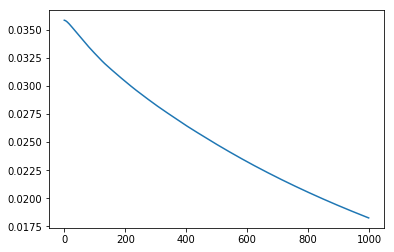

In [245]:
plt.plot(losses)

In [246]:
preds.shape

(1000, 14, 16, 16)

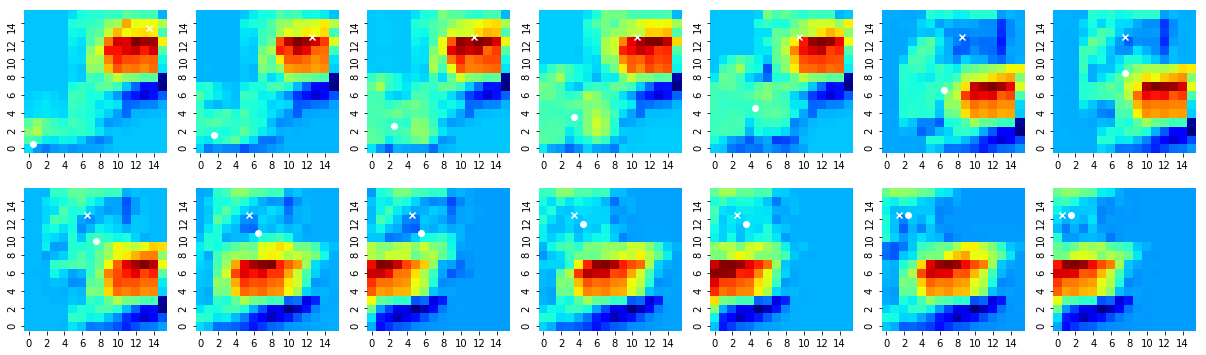

In [261]:
fig, ax = plt.subplots(2, 7, figsize=(21, 6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    axes= sns.heatmap(preds[0][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()

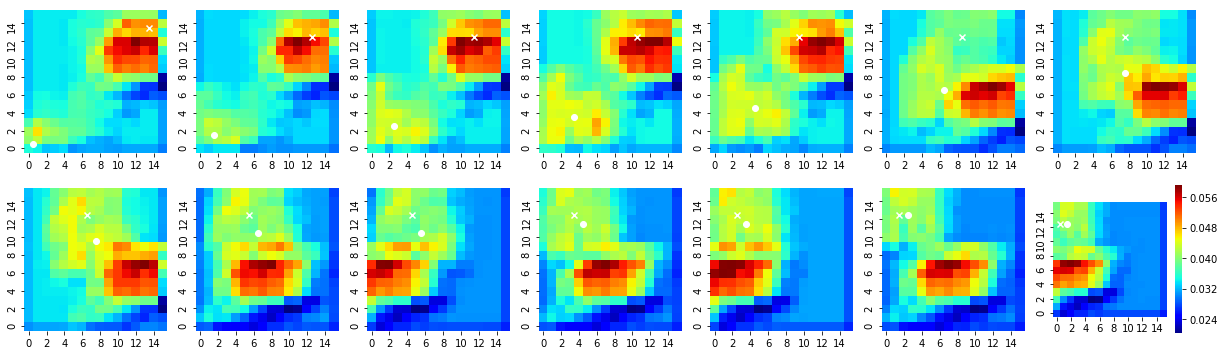

In [265]:
fig, ax = plt.subplots(2, 7, figsize=(21,6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    if i == 13:
        axes= sns.heatmap(preds[99][i].T, square=True, ax=ax[j, k], cbar=True, cmap='jet')
    else:
        axes= sns.heatmap(preds[99][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()

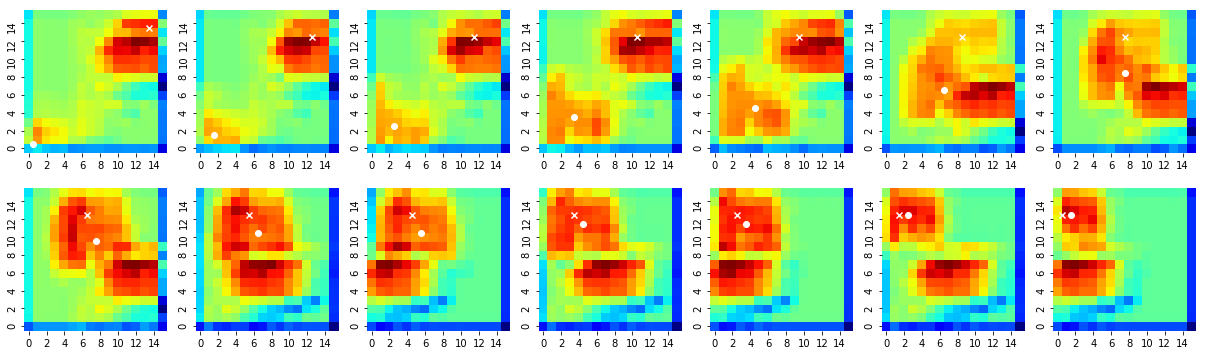

In [263]:
fig, ax = plt.subplots(2, 7, figsize=(21,6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    axes= sns.heatmap(preds[499][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()

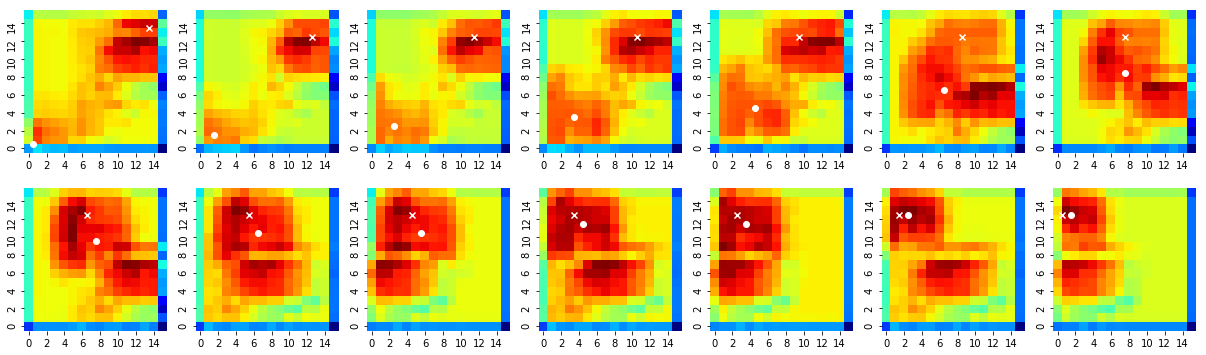

In [264]:
fig, ax = plt.subplots(2, 7, figsize=(21,6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    axes= sns.heatmap(preds[999][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()